In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import necessary library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py
from scipy.interpolate import griddata


# 1. Data read

The dataset is a solution of the Burgers' equation.

In [ ]:
# Read the data from reference file
### need to be filled
hf = h5py.File('/content/drive/My Drive/burgers_shock.h5','r')
t = np.array(hf.get('/t')).T
x = np.array(hf.get('/x')).T
Exact = np.array(hf.get('/usol'))
hf.close()
nu = 0.01/np.pi

In [ ]:
# Define mesh and input/output training data
X,T = np.meshgrid(x,t)
X_all = np.hstack((X.flatten()[:,None],T.flatten()[:,None]))
Uexact_all = Exact.flatten()[:,None]

In [ ]:
print(x.shape)
print(T.shape)
print(X_all[:,0].shape)
print(T.flatten().shape)
print(X_all.shape)
print(Exact.shape)
print(Uexact_all.shape)

In [ ]:
print(X_all[:,0].shape)
print(len(X_all[:,0]))
print(Uexact_all.shape)

(25600,)
25600
(25600, 1)


Text(0.5, 0, 'u')

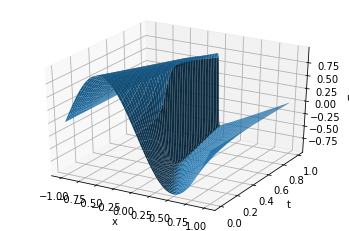

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,T,Exact)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

# 2. Definition of the neural network

In [ ]:
# define your neural network
inn2 = tf.keras.Input(shape=(2),dtype=tf.float32)

dense3 = tf.keras.layers.Dense(20,activation='tanh')
#dense4 = tf.keras.layers.Dense(20,activation='tanh')

output_layer2 = tf.keras.layers.Dense(1,activation='linear')

x1 = dense3(inn2)
#x2 = dense4(x1)
output2 = output_layer2(x1)

model = tf.keras.Model(inputs=inn2,outputs=output2)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(2),dtype=tf.float32))
model.add(tf.keras.layers.Dense(20,activation='tanh'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Ntrain = np.int(np.round(0.75*len(X_all[:,0])))
# idx_train = np.random.choice(len(X_all[:,0]),Ntrain,replace=False)
# print(idx_train)
# xx_train = X_all[idx_train,:]
# yy_train = Uexact_all[idx_train]
# yy_train = yy_train.reshape(yy_train.shape[0],)

# idx_val = set(range(len(X_all[:,0]))) - set(idx_train)
# idx_val = list(idx_val)

# xx_val = X_all[idx_val,:]
# yy_val = Uexact_all[idx_val]
# yy_val = yy_val.reshape(yy_val.shape[0],)

[23201 17797 22876 ... 21292  4798 17828]


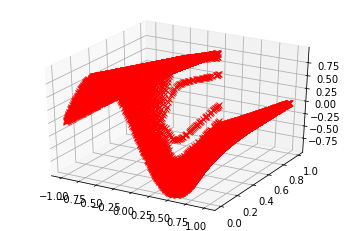

In [ ]:
# %matplotlib inline
# fig = plt.figure()
# ax = fig.add_subplot(111,projection='3d')
# ax.plot(xx_train[:,0],xx_train[:,1],yy_train,'rx')
# #ax.plot(xx_val[:,0],xx_val[:,1],yy_val,'bx')

In [ ]:
# # Training of the neural network
#hist2 = model.fit(xx_train,yy_train,validation_data=(xx_val,yy_val),batch_size=10,epochs=300,verbose=1)
hist2 = model.fit(X_all,Uexact_all,batch_size=10,epochs=50,verbose=1,validation_split=0.25)

Epoch 1/50
1920/1920 [==============================] - 2s 1ms/step - loss: 0.2721 - val_loss: 0.1850
Epoch 2/50
1920/1920 [==============================] - 2s 994us/step - loss: 0.2214 - val_loss: 0.1156
Epoch 3/50
1920/1920 [==============================] - 2s 971us/step - loss: 0.0777 - val_loss: 0.0836
Epoch 4/50
1920/1920 [==============================] - 2s 971us/step - loss: 0.0467 - val_loss: 0.0707
Epoch 5/50
1920/1920 [==============================] - 2s 971us/step - loss: 0.0381 - val_loss: 0.0502
Epoch 6/50
1920/1920 [==============================] - 2s 970us/step - loss: 0.0327 - val_loss: 0.0448
Epoch 7/50
1920/1920 [==============================] - 2s 952us/step - loss: 0.0299 - val_loss: 0.0397
Epoch 8/50
1920/1920 [==============================] - 2s 955us/step - loss: 0.0284 - val_loss: 0.0360
Epoch 9/50
1920/1920 [==============================] - 2s 969us/step - loss: 0.0273 - val_loss: 0.0334
Epoch 10/50
1920/1920 [==============================] - 2s 972us/

# 3 Training visualization

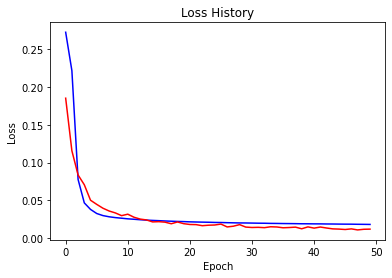

In [ ]:
loss_train = hist2.history['loss']
loss_val = hist2.history['val_loss']
%matplotlib inline
plt.plot(loss_train,'b')
plt.plot(loss_val,'r')
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()


# 4. Prediction visualization
Now predict and visualize your solution compared to the dataset.

In [ ]:
# prediction with the trained model
yy_nn = model.predict(X_all)
yy_nn_reshaped = yy_nn.reshape(100,256)
# reproject the solution on a grid - you can use the griddata function from scipy.
# xx1 = X.flatten().reshape(25600,1)
# xx2 = T.flatten().reshape(25600,1)

# print(xx1.shape)
# print(xx2.shape)
print(yy_nn.shape)

(25600, 1)


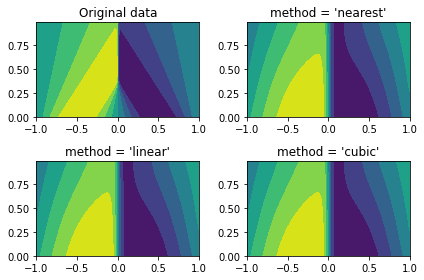

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)
# Plot the model function and the randomly selected sample points
ax[0,0].contourf(X, T, Exact)
#ax[0,0].scatter(X_all[:,0], X_all[:,1], c='k', alpha=0.2, marker='.')
ax[0,0].set_title('Original data')

# Interpolate using three different methods and plot
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Yi = griddata((X_all[:,0], X_all[:,1]), yy_nn, (X, T), method=method)
    Yi = Yi.reshape(100,256)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, T, Yi)
    ax[r,c].set_title("method = '{}'".format(method))

plt.tight_layout()
plt.show()

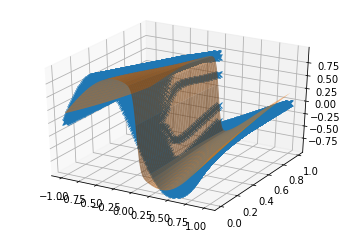

In [ ]:
## plot the predicted surface and the original data
Uexact_all = Uexact_all.reshape(25600,)
# and the error between the two
%matplotlib inline 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(X.flatten(),T.flatten(),Uexact_all,'x')
#ax.plot(X,T,Exact,alpha=0.6)
ax.plot_surface(X,T,yy_nn_reshaped,alpha=0.6)

